In [141]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [142]:
data16=pd.read_excel("AQI 2016 (1).xls")

In [143]:
data17=pd.read_excel("AQI 2017.xlsx")

In [144]:
data18=pd.read_excel("2018_AQI.xlsx")

In [145]:
data19=pd.read_excel("2019_AQI.xlsx")

In [146]:
data20=pd.read_excel("2020_AQI.xlsx")

In [147]:
data21=pd.read_excel("2021_AQI.xlsx")

In [148]:
data22=pd.read_excel("2022_AQI.xlsx")

In [149]:
data22

,Location,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
0,Nizamabad,56,59.000000,64.000000,58.000000,56.222222,54,46.000000,53,54,63,56,59
1,Adilabad,54,55.000000,56.000000,65.000000,60.148148,58,48.000000,56,56,65,58,62
2,"Kuda, warangal",58,64.000000,49.105826,66.173930,53.704530,72,40.428571,43,41,64,49,116
3,"Mee-Seva, Warangal",73,72.514053,76.057747,60.080031,77.094650,85,47.268637,56,48,64,94,94
4,Karimnagar,82,90.333333,95.666667,69.926215,76.241282,89,69.197791,55,58,63,101,126
5,Khammam,80,78.079300,76.518519,79.365731,76.611111,81,72.500000,58,42,57,78,115


# Dataset of Khammam

In [150]:
Meeseva_Warangal_data=list(data16.T[3][1:-6])+list(data17.T[3][1:-1])+list(data18.T[3][1:])+list(data19.T[3][1:])+list(data20.T[3][1:])+list(data21.T[3][1:])+list(data22.T[3][1:])

dt=Meeseva_Warangal_data

dt

[75.77777777777777,
 72.11111111111111,
 63.111111111111114,
 73.37037037037038,
 84.11111111111111,
 68.33333333333333,
 63.229166666666664,
 38.166666666666664,
 51.666666666666664,
 60.75,
 83.44444444444444,
 84,
 75.88888888888889,
 77.85185185185185,
 70.77777777777777,
 71.99999999999999,
 68.04166666666667,
 61.166666666666664,
 47.5,
 59.541666666666664,
 61.57142857142857,
 62.46296296296297,
 75.51851851851852,
 77.70370370370371,
 94.1111111111111,
 96.4444444444444,
 79.2222222222222,
 82.6666666666667,
 81.1111111111111,
 83.8888888888889,
 69.5,
 72.8333333333333,
 80.0659859042128,
 89.281508700092,
 94.2222222222222,
 88,
 90.5555555555556,
 90.8148148148148,
 92.1481481481481,
 89.0561301460369,
 93.0740740740741,
 85.6481481481482,
 86.8703703703704,
 79.875,
 72.9166666666667,
 85.3333333333333,
 90.5925925925926,
 87.2592592592593,
 89.0,
 88.0,
 74.0,
 41.0,
 65,
 58.25,
 67,
 60.8,
 55,
 61,
 91.8888888888889,
 91.4444444444444,
 81.2592592592593,
 88,
 75,
 71,


In [151]:
L=['1-1-2016','1-2-2016','1-3-2016','1-4-2016','1-5-2016','1-6-2016','1-7-2016','1-8-2016','1-9-2016','1-10-2016','1-11-2016','1-12-2016','1-1-2017','1-2-2017','1-3-2017','1-4-2017','1-5-2017','1-6-2017','1-7-2017','1-8-2017','1-9-2017','1-10-2017','1-11-2017','1-12-2017']
L=L+['1-1-2018','1-2-2018','1-3-2018','1-4-2018','1-5-2018','1-6-2018','1-7-2018','1-8-2018','1-9-2018','1-10-2018','1-11-2018','1-12-2018']
L=L+['1-1-2019','1-2-2019','1-3-2019','1-4-2019','1-5-2019','1-6-2019','1-7-2019','1-8-2019','1-9-2019','1-10-2019','1-11-2019','1-12-2019']
L=L+['1-1-2020','1-2-2020','1-3-2020','1-4-2020','1-5-2020','1-6-2020','1-7-2020','1-8-2020','1-9-2020','1-10-2020','1-11-2020','1-12-2020']
L=L+['1-1-2021','1-2-2021','1-3-2021','1-4-2021','1-5-2021','1-6-2021','1-7-2021','1-8-2021','1-9-2021','1-10-2021','1-11-2021','1-12-2021']
L=L+['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
L

['1-1-2016',
 '1-2-2016',
 '1-3-2016',
 '1-4-2016',
 '1-5-2016',
 '1-6-2016',
 '1-7-2016',
 '1-8-2016',
 '1-9-2016',
 '1-10-2016',
 '1-11-2016',
 '1-12-2016',
 '1-1-2017',
 '1-2-2017',
 '1-3-2017',
 '1-4-2017',
 '1-5-2017',
 '1-6-2017',
 '1-7-2017',
 '1-8-2017',
 '1-9-2017',
 '1-10-2017',
 '1-11-2017',
 '1-12-2017',
 '1-1-2018',
 '1-2-2018',
 '1-3-2018',
 '1-4-2018',
 '1-5-2018',
 '1-6-2018',
 '1-7-2018',
 '1-8-2018',
 '1-9-2018',
 '1-10-2018',
 '1-11-2018',
 '1-12-2018',
 '1-1-2019',
 '1-2-2019',
 '1-3-2019',
 '1-4-2019',
 '1-5-2019',
 '1-6-2019',
 '1-7-2019',
 '1-8-2019',
 '1-9-2019',
 '1-10-2019',
 '1-11-2019',
 '1-12-2019',
 '1-1-2020',
 '1-2-2020',
 '1-3-2020',
 '1-4-2020',
 '1-5-2020',
 '1-6-2020',
 '1-7-2020',
 '1-8-2020',
 '1-9-2020',
 '1-10-2020',
 '1-11-2020',
 '1-12-2020',
 '1-1-2021',
 '1-2-2021',
 '1-3-2021',
 '1-4-2021',
 '1-5-2021',
 '1-6-2021',
 '1-7-2021',
 '1-8-2021',
 '1-9-2021',
 '1-10-2021',
 '1-11-2021',
 '1-12-2021',
 '1-1-2022',
 '1-2-2022',
 '1-3-2022',
 '1-4-2

In [152]:
df=pd.DataFrame()
df.reset_index()
df["Date"]=L
df["AQI"]=dt
df

,Date,AQI
0,1-1-2016,75.777778
1,1-2-2016,72.111111
2,1-3-2016,63.111111
3,1-4-2016,73.370370
4,1-5-2016,84.111111
...,...,...
79,1-8-2022,56.000000
80,1-9-2022,48.000000
81,1-10-2022,64.000000
82,1-11-2022,94.000000


In [153]:
df1=df[["Date","AQI"]]
df1['Date'] = pd.to_datetime(df1['Date'], format='%m-%d-%Y').dt.strftime('%d-%Y')

df["Date"]=pd.to_datetime(df["Date"])
print(df1)
x=df["Date"]
y=df["AQI"]
#plt.plot(x,y)
df=df.set_index("Date")

       Date        AQI
0   01-2016  75.777778
1   02-2016  72.111111
2   03-2016  63.111111
3   04-2016  73.370370
4   05-2016  84.111111
..      ...        ...
79  08-2022  56.000000
80  09-2022  48.000000
81  10-2022  64.000000
82  11-2022  94.000000
83  12-2022  94.000000

[84 rows x 2 columns]


In [154]:
df1

,Date,AQI
0,01-2016,75.777778
1,02-2016,72.111111
2,03-2016,63.111111
3,04-2016,73.370370
4,05-2016,84.111111
...,...,...
79,08-2022,56.000000
80,09-2022,48.000000
81,10-2022,64.000000
82,11-2022,94.000000


In [155]:
df1["Date"]

0     01-2016
1     02-2016
2     03-2016
3     04-2016
4     05-2016
       ...   
79    08-2022
80    09-2022
81    10-2022
82    11-2022
83    12-2022
Name: Date, Length: 84, dtype: object

# AQI levels of Warangal(Mee Seva) between 2016 and 2022

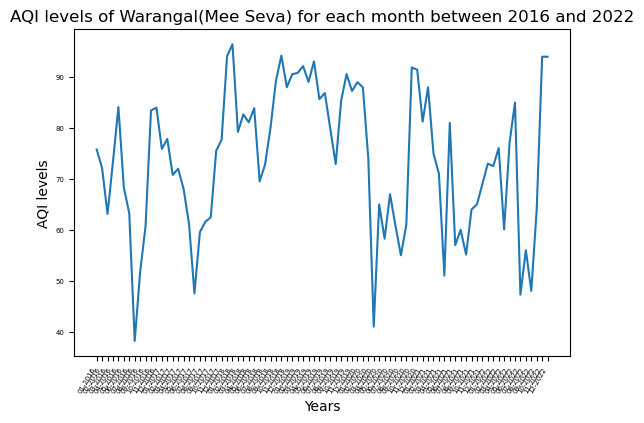

In [156]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],df1["AQI"], marker='', linestyle='-')

fig.autofmt_xdate()


plt.title("AQI levels of Warangal(Mee Seva) for each month between 2016 and 2022")
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(5)
plt.show()

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=666)

In [158]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(df)
print("The p-value of the dataset is",dfa[1])

The p-value of the dataset is 0.00041056356863627665


In [159]:
#plt.plot(df)

In [160]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(df["AQI"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=654.105, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=685.720, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=649.847, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=660.993, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=965.748, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=651.833, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=651.832, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=653.836, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=669.104, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.737 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -321.924
Date:                Sat, 04 Mar 2023   AIC                            649.847
Time:                        18:40:05   BIC                            657.140
Sample:                             0   HQIC                           652.779
                                 - 84                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     28.6500      7.956      3.601      0.000      13.057      44.243
ar.L1          0.6131      0.112      5.470      0.000       0.393       0.833
sigma2       124.1022     17.347      7.154      0.000      90.103     158.102
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.85
Prob(Q):                              0.94   Prob(JB):                         0.01
Heteroskedasticity (H):               1.83   Skew:                            -0.60
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
'''df.sort_index(inplace=True)
df'''

'df.sort_index(inplace=True)\ndf'

In [162]:
train=df.iloc[:-12]
test=df.iloc[-12:]

# ARIMA model

In [163]:
from statsmodels.tsa.arima.model import ARIMA 
print(train)
model =ARIMA(train,order=(1,0,0),seasonal_order=(0,1,1,12))
model_fit =model.fit()
model_fit.summary()

                  AQI
Date                 
2016-01-01  75.777778
2016-01-02  72.111111
2016-01-03  63.111111
2016-01-04  73.370370
2016-01-05  84.111111
...               ...
2021-01-08  60.000000
2021-01-09  55.134376
2021-01-10  64.000000
2021-01-11  65.000000
2021-01-12  69.000000

[72 rows x 1 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   72
Model:             ARIMA(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -232.364
Date:                            Sat, 04 Mar 2023   AIC                            470.729
Time:                                    18:40:05   BIC                            477.012
Sample:                                         0   HQIC                           473.187
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6004      0.111      5.402      0.000       0.383       0.818
ma.S.L12      -0.9968     28.086     -0.035      0.972     -56.044      54.050
sigma2        94.1763   2632.806      0.036      0.971   -5066.029    5254.382
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):                13.44
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                            -0.57
Prob(H) (two-sided):                  0.35   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

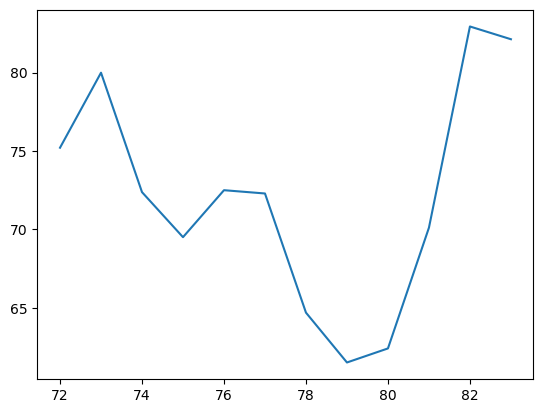

In [164]:
pred_new=model_fit.forecast(12)
plt.plot(pred_new)

In [165]:
#res.index

In [166]:
time_list=['1-1-2022','1-2-2022','1-3-2022','1-4-2022','1-5-2022','1-6-2022','1-7-2022','1-8-2022','1-9-2022','1-10-2022','1-11-2022','1-12-2022']
res=pd.DataFrame(pred_new)
res["Date"]=time_list
a=list(res['predicted_mean'])
res["AQI"]=a
res=res.drop(["predicted_mean"],axis=1)
res["Date"]=pd.to_datetime(res["Date"])
df2=res[["Date","AQI"]]
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")

In [167]:
final_data =train
pred_data=final_data.append(res)

In [168]:
#df2

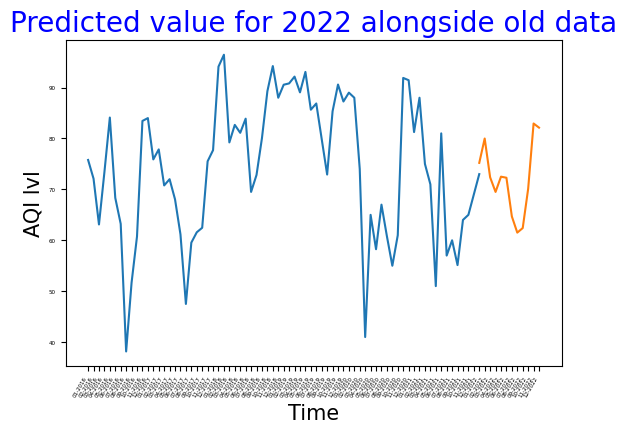

In [177]:

fig, ax = plt.subplots()
ax.plot_date(df1["Date"][:-11],df1["AQI"][:-11], marker='', linestyle='-')
ax.plot_date(df2["Date"],df2["AQI"] ,marker='', linestyle='-')
fig.autofmt_xdate()


plt.title("Predicted value for 2022 alongside old data",fontsize = 20,c='b')
plt.xlabel("Time",fontsize = 15)
plt.ylabel("AQI lvl",fontsize = 15)

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()



# Performance of the model

In [170]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred_new,test["AQI"]))
ame=mean_absolute_error(pred_new,test["AQI"])

print("Average Temperature         : ",df['AQI'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  73.69500672889869
Root mean Square value      :  9.948673135114664
Mean absolute Error         :  8.872676436581267


# Forcasting for 2023

In [171]:
model =ARIMA(df,order=(1,0,0),seasonal_order=(0,1,1,12))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   84
Model:             ARIMA(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -278.103
Date:                            Sat, 04 Mar 2023   AIC                            562.205
Time:                                    18:40:07   BIC                            569.035
Sample:                                         0   HQIC                           564.924
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5655      0.108      5.220      0.000       0.353       0.778
ma.S.L12      -0.7996      0.271     -2.951      0.003      -1.331      -0.269
sigma2       112.0839     24.014      4.668      0.000      65.018     159.150
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                11.58
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -0.61
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [172]:
pred_new =model_fit.forecast(12)
print("The predicted AQI values of each month of 2023 is:\n",pd.DataFrame(pred_new))

The predicted AQI values of each month of 2023 is:
     predicted_mean
84       89.045924
85       87.166589
86       78.365681
87       69.266793
88       73.484200
89       76.439184
90       61.486879
91       61.154839
92       58.996142
93       68.613257
94       84.833390
95       84.454980


In [173]:
res=pd.DataFrame(pred_new)
res.columns=["AQI"]
time_list=['1-1-2023','1-2-2023','1-3-2023','1-4-2023','1-5-2023','1-6-2023','1-7-2023','1-8-2023','1-9-2023','1-10-2023','1-11-2023','1-12-2023']
res["AQI"]=pred_new
res["Date"]=time_list
res["Date"]=pd.to_datetime(res["Date"])
res['Date'] = pd.to_datetime(res['Date'], format='%Y-%d-%m').dt.strftime('%d-%Y')
res=res.set_index("Date")
res

,AQI
Date,
01-2023,89.045924
02-2023,87.166589
03-2023,78.365681
04-2023,69.266793
05-2023,73.484200
06-2023,76.439184
07-2023,61.486879
08-2023,61.154839
09-2023,58.996142


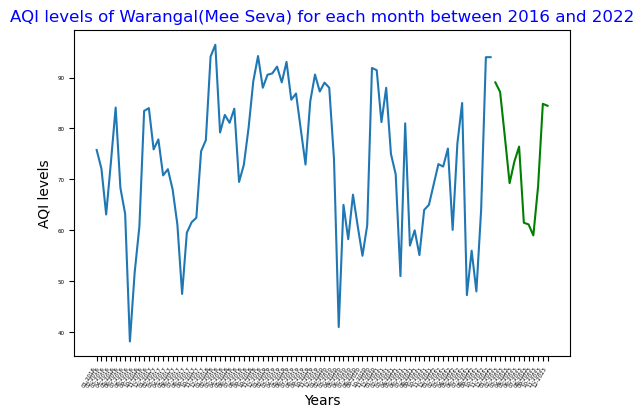

In [174]:
fig, ax = plt.subplots()
ax.plot_date(df1["Date"],y, marker='', linestyle='-')
plt.plot(res,c='g')

fig.autofmt_xdate()


plt.title("AQI levels of Warangal(Mee Seva) for each month between 2016 and 2022",c='b')
plt.xlabel("Years")
plt.ylabel("AQI levels")

plt.setp(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(4)
plt.show()
